In [1]:
cd "C:\Users\jan.santora\Dearman Engine Company Ltd\Core Systems - Documents\SimulationAndAnalysis\Test\ETR\ETR-271-PistonSealDevelopment-BeddingIn+SealAlloc_PVX\"

C:\Users\jan.santora\Dearman Engine Company Ltd\Core Systems - Documents\SimulationAndAnalysis\Test\ETR\ETR-271-PistonSealDevelopment-BeddingIn+SealAlloc_PVX


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from matplotlib.pyplot import figure

from bokeh.io import show, output_file
from bokeh.plotting import figure, ColumnDataSource
from bokeh.models import CustomJS
from bokeh.palettes import Spectral4
from bokeh.layouts import widgetbox, layout
from bokeh.models.widgets import RadioButtonGroup, Button
#figure(num=None, figsize=(18, 16), dpi=80, facecolor='w', edgecolor='k')
%matplotlib inline

In [3]:
df = pd.read_excel('ETR0271_Data.xlsx','Sheet1')
df.columns

Index(['Part', 'Date ', 'Test run', 'Pressure', 'Engine Speed', 'Run Time',
       'Run time (hrs)', 'Scavenge Volume', 'Scavenge Rate',
       'Dyno Power avrg'],
      dtype='object')

In [4]:
print('Number of tests: ', len(df))
print('Describtion: \n',df.describe())
print('Total run time: \n',df['Run time (hrs)'].sum())

Number of tests:  61
Describtion: 
           Test run   Pressure  Engine Speed   Run Time  Run time (hrs)  \
count    61.000000  61.000000     61.000000  61.000000       61.000000   
mean   2698.114754  37.540984    900.000000  10.672131        0.177869   
std      21.809859   5.312952     81.649658   5.965851        0.099431   
min    2661.000000  30.000000    800.000000   3.200000        0.053333   
25%    2682.000000  37.500000    800.000000   6.900000        0.115000   
50%    2698.000000  37.500000    900.000000  10.200000        0.170000   
75%    2715.000000  40.000000   1000.000000  12.400000        0.206667   
max    2738.000000  45.000000   1000.000000  41.400000        0.690000   

       Scavenge Volume  Scavenge Rate  Dyno Power avrg  
count        15.000000      15.000000        61.000000  
mean       5224.666667    7672.708727         3.830087  
std        1428.295021    2457.792799         0.740623  
min        4050.000000    4429.602888         2.623333  
25%        4

In [6]:
slow_rpm=df[df['Engine Speed'] == 800]
med_rpm=df[df['Engine Speed'] == 900]
fast_rpm = df[df['Engine Speed'] == 1000]

slow_rpm.head()

,Part,Date,Test run,Pressure,Engine Speed,Run Time,Run time (hrs),Scavenge Volume,Scavenge Rate,Dyno Power avrg
0,Part 3,2018-08-01,2661,37.5,800,14.0,0.233333,NaN,NaN,3.583333
1,NaN,2018-08-01,2662,30.0,800,6.0,0.100000,NaN,NaN,2.681667
2,NaN,2018-08-01,2663,45.0,800,8.0,0.133333,NaN,NaN,4.496667
3,NaN,2018-08-01,2664,37.5,800,4.0,0.066667,5130.0,9618.75,3.583333
12,Part 4,2018-08-06,2678,37.5,800,10.5,0.175000,NaN,NaN,3.591667


In [7]:
df.columns

Index(['Part', 'Date ', 'Test run', 'Pressure', 'Engine Speed', 'Run Time',
       'Run time (hrs)', 'Scavenge Volume', 'Scavenge Rate',
       'Dyno Power avrg'],
      dtype='object')

## Basic Bokeh Graph

In [36]:
from bokeh.models import HoverTool
from bokeh.plotting import figure, output_file, show


xx=slow_rpm.dropna(subset=['Scavenge Rate'])
x=xx['Scavenge Rate']
y=xx['Dyno Power avrg']

xx2=med_rpm.dropna(subset=['Scavenge Rate'])
x2=xx2['Scavenge Rate']
y2=xx2['Dyno Power avrg']

xx3=fast_rpm.dropna(subset=['Scavenge Rate'])
x3=xx3['Scavenge Rate']
y3=xx3['Dyno Power avrg']

output_file("Scavenge Rate.html")
p=figure(plot_height=1000,plot_width=1500)

#p.line(x, y, line_width=2, color="red")
p.circle(x, y, size=10, color="navy", alpha = 1, legend="800 RPM", fill_color="white")
#p.line(x2, y2, line_width=2)
p.circle(x2, y2, size=10, color="green", alpha = 1, legend="900 RPM", fill_color="white")
#p.line(x3,y3 , line_width=2)
p.circle(x3, y3, size=10, color="red", alpha = 1, legend="1000 RPM", fill_color="white")

p.xaxis.axis_label="Scavenge Rate [L/hr]"
p.yaxis.axis_label="Power [kW]"

p.legend.location = "top_left"
p.title.align = "center"
p.title.text = "Power is at 37.5 bar"

p.add_tools(HoverTool(

    tooltips=[('Scavenge Rate', '@x{2f}'),('Power', '@y{0.2f}')],
    mode='mouse'

))

show(p)

In [8]:
df.loc[0:11,'Part'] = "Part 3"
df.loc[12:23,'Part'] ="Part 4"
df.loc[24:36,'Part'] = "Part 5"
df.loc[37:48,'Part'] = "Part 6"
df.loc[49:60,'Part'] = "Part 7"

In [9]:
part_three = df[df['Part'] == "Part 3"]
part_four =df[df['Part'] =="Part 4"]
part_five =df[df['Part'] =="Part 5"]
part_six =df[df['Part'] =="Part 6"]
part_seven =df[df['Part'] =="Part 7"]

In [10]:
df.head()

,Part,Date,Test run,Pressure,Engine Speed,Run Time,Run time (hrs),Scavenge Volume,Scavenge Rate,Dyno Power avrg
0,Part 3,2018-08-01,2661,37.5,800,14.0,0.233333,NaN,NaN,3.583333
1,Part 3,2018-08-01,2662,30.0,800,6.0,0.100000,NaN,NaN,2.681667
2,Part 3,2018-08-01,2663,45.0,800,8.0,0.133333,NaN,NaN,4.496667
3,Part 3,2018-08-01,2664,37.5,800,4.0,0.066667,5130.0,9618.75,3.583333
4,Part 3,2018-08-01,2665,37.5,900,6.1,0.101667,NaN,NaN,3.823333


## Bokeh graph with the ability to hide series

In [30]:
p=figure(plot_height=1000,plot_width=1500)
p.circle(x=part_three['Scavenge Rate'], y=part_three['Dyno Power avrg'], size=10, color ="navy", alpha=1, legend="Part 3")
p.circle(x=part_four['Scavenge Rate'], y=part_four['Dyno Power avrg'], size=10, color ="green", alpha=1, legend="Part 4")
p.circle(x=part_five['Scavenge Rate'], y=part_five['Dyno Power avrg'], size=10, color ="red", alpha=1, legend="Part 5")
p.circle(x=part_six['Scavenge Rate'], y=part_six['Dyno Power avrg'], size=10, color ="cyan", alpha=1, legend="Part 6")
p.circle(x=part_seven['Scavenge Rate'], y=part_seven['Dyno Power avrg'], size=10, color ="black", alpha=1, legend="Part 7")
p.xaxis.axis_label="Scavenge Rate [L/hr]"
p.yaxis.axis_label="Power [kW]"

p.legend.location = "top_left"
p.legend.click_policy="hide"
p.title.align = "center"
p.title.text = "Power is at 37.5 bar"

button_group = RadioButtonGroup(labels=["Part 3", "Part 4", "Part 5","Part 6","Part 7"], active = 0)

p.add_tools(HoverTool(

    tooltips=[('Scavenge Rate', '@x{2f}'),('Power', '@y{0.2f}')],
    mode='mouse'

))


l = layout([[p],[button_group]])

output_file("Parts.html")

show(l)

# Bokeh layout with two tabs and ability to hide series from clicking on the legend

In [68]:
from bokeh.models.widgets import Panel, Tabs

scav_rate=df['Scavenge Rate']
dyno_power = df['Dyno Power avrg']

p1=figure(plot_height=1000,plot_width=1500)
p1.circle(x =slow_rpm['Scavenge Rate'], y=slow_rpm['Dyno Power avrg'], size=10, color="navy", alpha = 1, legend="800 RPM")
p1.x(x =med_rpm['Scavenge Rate'], y=med_rpm['Dyno Power avrg'], size=10, color="green", alpha = 1, legend="900 RPM", line_width=3)
p1.asterisk(x =fast_rpm['Scavenge Rate'], y=fast_rpm['Dyno Power avrg'], size=12, color="red", alpha = 1, legend="1000 RPM", line_width=2)
p1.xaxis.axis_label="Scavenge Rate [L/hr]"
p1.yaxis.axis_label="Power [kW]"
p1.xaxis.axis_label_text_font_size= "14pt"
p1.yaxis.axis_label_text_font_size= "14pt"
p1.xaxis.major_label_text_font_size= "14pt"
p1.yaxis.major_label_text_font_size= "14pt"
p1.title.text_font_size="16pt"
p1.legend.label_text_font_size="12pt"

p1.legend.location = "top_left"
p1.legend.click_policy="hide"
p1.title.align = "center"
p1.title.text = "Power is at 37.5 bar, Scavege rate is measured after all pressure sweeps within one speed"

p1.add_tools(HoverTool(

    tooltips=[('Scavenge Rate', '@x{2f}'),('Power', '@y{0.2f}')],
    mode='mouse'

))

tab1 = Panel(child=p1, title="Speeds")

p2=figure(plot_height=1000,plot_width=1500)
p2.circle(x=part_three['Scavenge Rate'], y=part_three['Dyno Power avrg'], size=10, color ="dodgerblue", alpha=1, legend="Part 3")
p2.circle(x=part_four['Scavenge Rate'], y=part_four['Dyno Power avrg'], size=10, color ="chartreuse", alpha=1, legend="Part 4")
p2.circle(x=part_five['Scavenge Rate'], y=part_five['Dyno Power avrg'], size=10, color ="red", alpha=1, legend="Part 5")
p2.circle(x=part_six['Scavenge Rate'], y=part_six['Dyno Power avrg'], size=10, color ="cyan", alpha=1, legend="Part 6")
p2.circle(x=part_seven['Scavenge Rate'], y=part_seven['Dyno Power avrg'], size=10, color ="black", alpha=1, legend="Part 7")
p2.xaxis.axis_label="Scavenge Rate [L/hr]"
p2.yaxis.axis_label="Power [kW]"
p2.xaxis.axis_label_text_font_size= "14pt"
p2.yaxis.axis_label_text_font_size= "14pt"
p2.xaxis.major_label_text_font_size= "14pt"
p2.yaxis.major_label_text_font_size= "14pt"
p2.title.text_font_size="16pt"
p2.legend.label_text_font_size="12pt"

p2.legend.location = "top_left"
p2.legend.click_policy="hide"
p2.title.align = "center"
p2.title.text = "Power is at 37.5 bar, Scavege rate is measured after all pressure sweeps within one speed"
p2.add_tools(HoverTool(

    tooltips=[('Scavenge Rate', '@x{2f}'),('Power', '@y{0.2f}')],
    mode='mouse'

))

tab2 = Panel(child=p2, title="Parts")


tabs = Tabs(tabs=[ tab1, tab2 ])
output_file("Speed&Parts.html")

show(tabs)

In [13]:
scav_rate = df.dropna(subset = ['Scavenge Rate'])
scav_rate_800 = scav_rate[scav_rate['Engine Speed'] ==800]
scav_rate_800

,Part,Date,Test run,Pressure,Engine Speed,Run Time,Run time (hrs),Scavenge Volume,Scavenge Rate,Dyno Power avrg
3,Part 3,2018-08-01,2664,37.5,800,4.0,0.066667,5130.0,9618.750000,3.583333
15,Part 4,2018-08-06,2682,37.5,800,5.8,0.096667,4650.0,8278.931751,3.598333
27,Part 5,2018-08-08,2694,37.5,800,3.2,0.053333,4090.0,4429.602888,3.578333
40,Part 6,2018-08-09,2709,37.5,800,9.9,0.165000,4900.0,5578.747628,3.563333
52,Part 7,2018-08-10,2722,37.5,800,10.5,0.175000,4050.0,5305.676856,3.500000


## 800, 900 and 1000 RPM and pressure 45 bar, scavenge rate vs Power

In [14]:
power_800 = df[df['Engine Speed'] ==800]
power_800_45 = power_800[power_800['Pressure'] == 45]
power_800_45 = power_800_45.dropna(subset=['Part'])

power_900 = df[df['Engine Speed'] ==900]
power_900_45 = power_900[power_900['Pressure'] == 45]
power_900_45 = power_900_45.dropna(subset=['Part'])

power_1000 = df[df['Engine Speed'] ==1000]
power_1000_45 = power_1000[power_1000['Pressure'] == 45]
power_1000_45 = power_1000_45.dropna(subset=['Part'])





## 30 bar

In [15]:
power2_800 = df[df['Engine Speed'] ==800]
power2_800_45 = power2_800[power_800['Pressure'] == 30]
power2_800_45 = power2_800_45.dropna(subset=['Part'])

power2_900 = df[df['Engine Speed'] ==900]
power2_900_45 = power2_900[power_900['Pressure'] == 30]
power2_900_45 = power2_900_45.dropna(subset=['Part'])

power2_1000 = df[df['Engine Speed'] ==1000]
power2_1000_45 = power2_1000[power_1000['Pressure'] == 30]
power2_1000_45 = power2_1000_45.dropna(subset=['Part'])

## Two tabs for 30 and 45 bar pressure to show scavange rate vs dyno power with ability to hide series

In [73]:
output_file("Scavenge Rate_45bar.html")

p1=figure(plot_height=1000,plot_width=1500)
p1.circle(x =scav_rate_800['Scavenge Rate'], y=power_800_45['Dyno Power avrg'], size=10, color="navy", alpha = 1, legend="800 RPM")
p1.x(x =scav_rate_800['Scavenge Rate'], y=power_900_45['Dyno Power avrg'], size=10, color="green", alpha = 1, legend="900 RPM", line_width = 3)
p1.asterisk(x =scav_rate_800['Scavenge Rate'], y=power_1000_45['Dyno Power avrg'], size=12, color="red", alpha = 1, legend="1000 RPM", line_width =2)
p1.xaxis.axis_label="Scavenge Rate [L/hr]"
p1.yaxis.axis_label="Power [kW]"

p1.legend.location = "top_right"
p1.legend.click_policy="hide"
p1.title.align = "center"
p1.title.text = "Power is at 45 bar"
p1.xaxis.axis_label_text_font_size= "14pt"
p1.yaxis.axis_label_text_font_size= "14pt"
p1.xaxis.major_label_text_font_size= "14pt"
p1.yaxis.major_label_text_font_size= "14pt"
p1.title.text_font_size="16pt"
p1.legend.label_text_font_size="12pt"

p1.add_tools(HoverTool(

    tooltips=[('Scavenge Rate', '@x{2f}'),('Power', '@y{0.2f}')],
    mode='mouse'

))

tab1 = Panel(child=p1, title="45bar")

p2=figure(plot_height=1000,plot_width=1500)
p2.circle(x =scav_rate_800['Scavenge Rate'], y=power2_800_45['Dyno Power avrg'], size=10, color="navy", alpha = 1, legend="800 RPM")
p2.x(x =scav_rate_800['Scavenge Rate'], y=power2_900_45['Dyno Power avrg'], size=10, color="green", alpha = 1, legend="900 RPM", line_width=3)
p2.asterisk(x =scav_rate_800['Scavenge Rate'], y=power2_1000_45['Dyno Power avrg'], size=10, color="red", alpha = 1, legend="1000 RPM", line_width=2)
p2.xaxis.axis_label="Scavenge Rate [L/hr]"
p2.yaxis.axis_label="Power [kW]"

p2.legend.location = "top_right"
p2.legend.click_policy="hide"
p2.title.align = "center"
p2.title.text = "Power is at 30 bar"
p2.xaxis.axis_label_text_font_size= "14pt"
p2.yaxis.axis_label_text_font_size= "14pt"
p2.xaxis.major_label_text_font_size= "14pt"
p2.yaxis.major_label_text_font_size= "14pt"
p2.title.text_font_size="16pt"
p2.legend.label_text_font_size="12pt"

p2.add_tools(HoverTool(

    tooltips=[('Scavenge Rate', '@x{2f}'),('Power', '@y{0.2f}')],
    mode='mouse'

))
tab2 = Panel(child=p2, title="30bar")

tabs = Tabs(tabs=[ tab1, tab2 ])

show(tabs)

# Bedding in results

In [17]:
#Details-beddingIn
df2 = pd.read_excel('ETR0271_Data.xlsx','Details-beddingIn')
df2 = df2.dropna(subset = ['Date'])
df2 = df2.drop(['HS Recorded'], axis=1)


In [18]:
df2Small = df2.dropna(subset = ['Corrected HEF Flow Rate(mL/hr)'])
df2Small

,Date,Run Number,Time Run(min),Crankcase Scav(ml),Time run (hr),Corrected HEF Flow Rate(mL/hr),Power avrg
2,2018-07-26,2649.0,25.00,7480.0,0.983333,7606.779661,3.786000
4,2018-07-27,2651.0,59.91,8600.0,0.9985,8612.919379,3.780000
5,2018-07-27,2652.0,60.30,8400.0,1.005,8358.208955,3.811667
6,2018-07-27,2653.0,60.20,8800.0,1.00333,8770.764120,3.823333
7,2018-07-30,2654.0,59.40,9650.0,0.99,9747.474747,3.770000
8,2018-07-31,2655.0,59.00,9500.0,0.983333,9661.016949,3.771667
9,2018-07-31,2656.0,60.60,9720.0,1.01,9623.762376,3.790000
10,2018-07-31,2657.0,60.40,9570.0,1.00667,9506.622517,3.814000
11,2018-07-31,2658.0,60.50,6950.0,1.00833,6892.561983,3.790000
12,2018-07-31,2660.0,60.60,9500.0,1.01,9405.940594,3.868333


In [19]:
df2Small.columns

Index(['Date', 'Run Number', 'Time Run(min)', 'Crankcase Scav(ml)',
       'Time run (hr)', 'Corrected HEF Flow Rate(mL/hr)', 'Power avrg'],
      dtype='object')

## Plotting two y axis graph using bokeh and click_policy ="hide", for power and Scavange flow rate on y axis, and date on x axis

In [72]:
from bokeh.models import LinearAxis, Range1d

p = figure(x_axis_type = "datetime", plot_height=1000,plot_width=1500)


p.circle(df2Small['Date'], df2Small['Corrected HEF Flow Rate(mL/hr)'], size=10, color="navy", alpha=1, legend ="HEF Flow rate [l/hr]")
p.xaxis.axis_label ="Date"
p.yaxis.axis_label="Scavenge Flow rate [l/hr]"
p.xaxis.axis_label_text_font_size= "14pt"
p.yaxis.axis_label_text_font_size= "14pt"
p.xaxis.major_label_text_font_size= "14pt"
p.yaxis.major_label_text_font_size= "14pt"
p.legend.location = "top_left"
p.legend.label_text_font_size="12pt"
p.title.align ="center"
p.title.text="Power and Scavenge Flow Rate"
p.title.text_font_size="16pt"

p.add_tools(HoverTool(

    tooltips=[
        ('Power/ScRate', '@y{0.2f}'), 
        ('Date','@x{%F}'),
    ],
    
    formatters={
        'x':'datetime',
    },
    mode='mouse'

))

p.extra_y_ranges={"Power":Range1d(start=3.5, end=4)}
p.add_layout(LinearAxis(y_range_name="Power", axis_label='Power [kW]'), 'right')


#p = figure(plot_height =1000,plot_width=1500)
p.x(df2Small['Date'], df2Small['Power avrg'], size=10, color="red", alpha=1, legend ="Power [kW]", y_range_name="Power", line_width=3)
p.legend.click_policy="hide"
p.xaxis.axis_label_text_font_size= "14pt"
p.yaxis.axis_label_text_font_size= "14pt"
p.xaxis.major_label_text_font_size= "14pt"
p.yaxis.major_label_text_font_size= "14pt"

output_file("BeddingIn.html")
show(p)


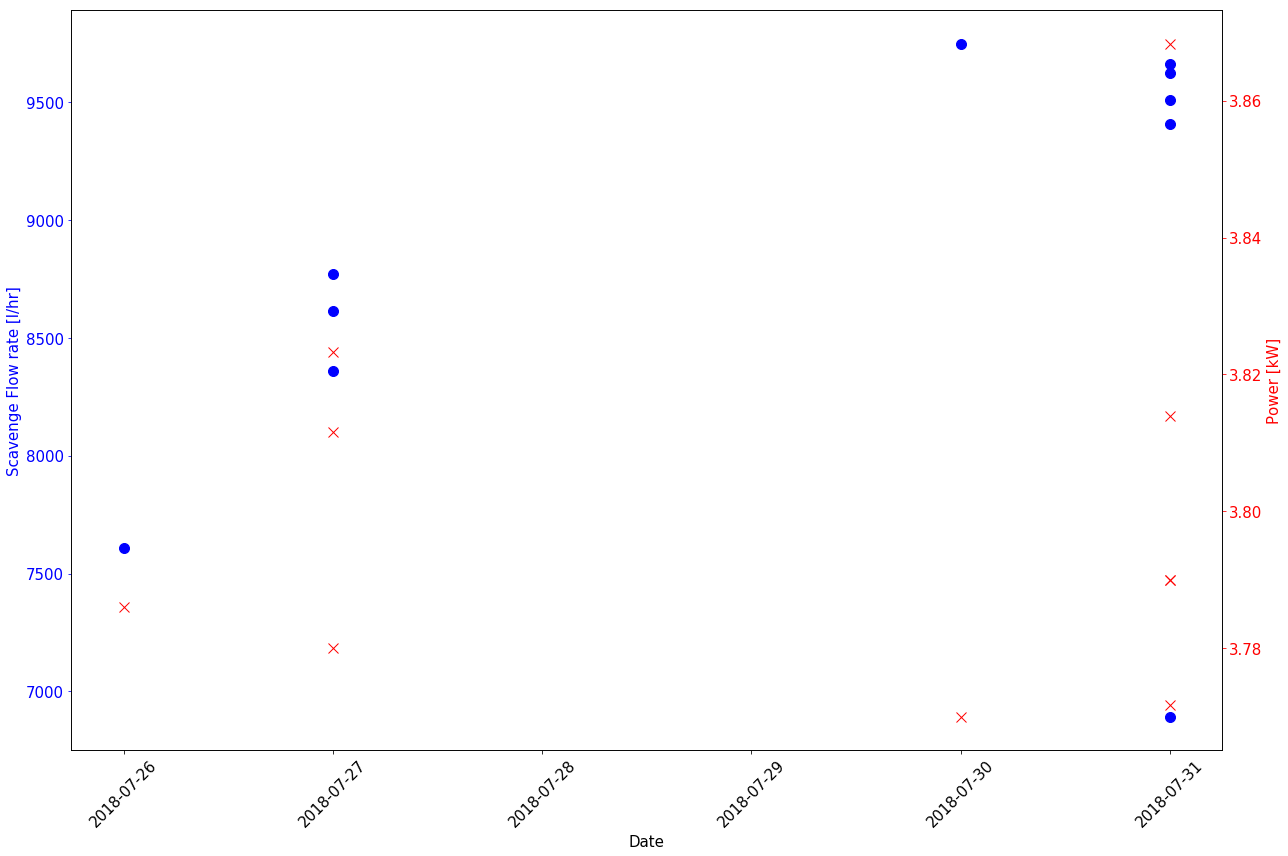

In [21]:
plt.rcParams['figure.figsize'] = 18, 12

fig, ax1 = plt.subplots()

ax1.plot(df2Small['Date'], df2Small['Corrected HEF Flow Rate(mL/hr)'], 'bo', markersize = 10)
ax1.set_xlabel('Date', fontsize =15)
ax1.tick_params('x', labelsize=15)
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Scavenge Flow rate [l/hr]', color='b',fontsize=15)
ax1.tick_params('y', colors='b', labelsize =15)

ax2 = ax1.twinx()
#s2 = np.sin(2 * np.pi * t)
ax2.plot(df2Small['Date'], df2Small['Power avrg'], 'rx', markersize = 10)
ax2.set_ylabel('Power [kW]', color='r', fontsize=15)
ax2.tick_params('y', colors='r', labelsize =15)

plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)

fig.tight_layout()
plt.show()